In [29]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import pairwise_distances_argmin_min, accuracy_score

In [2]:
def get_sse(x, predict):
    clf = NearestCentroid()
    clf.fit(x[['x','y']],predict)
    centroids = clf.centroids_
    argmin, distances = pairwise_distances_argmin_min(x[['x','y']] ,centroids)
    Sum = 0
    for i in range(distances.size):
        Sum+=distances[i]**2
    return Sum

In [3]:
banana_dataset = pd.read_csv('HW3_dataset/banana  (with class label).csv')

In [4]:
banana_x = banana_dataset.iloc[:,:2]
banana_y = banana_dataset.iloc[:,-1]

In [5]:
def banana_grouping(y):
    return_banana_0 = {'x':[], 'y':[]}
    return_banana_1 = {'x':[], 'y':[]}
    return_banana_2 = {'x':[], 'y':[]}
    return_banana_noice = {'x':[], 'y':[]}

    for i in range(y.size):
        if int(y[i]) == 0:
            return_banana_0['x'].append(banana_x['x'][i])
            return_banana_0['y'].append(banana_x['y'][i])
        elif int(y[i]) == 1:
            return_banana_1['x'].append(banana_x['x'][i])
            return_banana_1['y'].append(banana_x['y'][i])
        elif int(y[i]) == 2:
            return_banana_2['x'].append(banana_x['x'][i])
            return_banana_2['y'].append(banana_x['y'][i])
        else:
            return_banana_noice['x'].append(banana_x['x'][i])
            return_banana_noice['y'].append(banana_x['y'][i])
            
    return return_banana_0, return_banana_1, return_banana_2, return_banana_noice

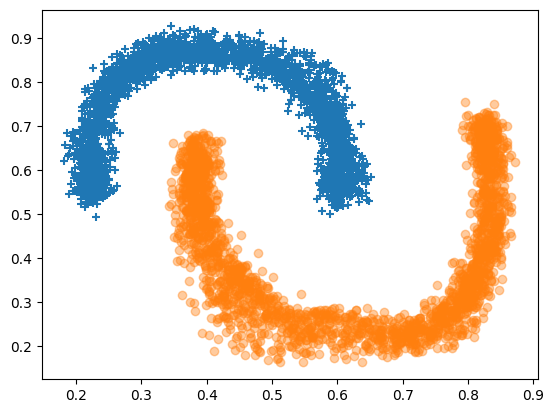

In [28]:
org_banana_0, org_banana_1, org_banana_2, _ = banana_grouping(banana_y)
plt.scatter(org_banana_1['x'], org_banana_1['y'],marker='+')
plt.scatter(org_banana_2['x'], org_banana_2['y'],marker='o', alpha=0.4)
plt.show()

In [7]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=50, max_iter=1000, n_init = 10)
kmeans.fit(banana_x,banana_y)
kmeans_y = kmeans.predict(banana_x, banana_y)
spend_time = time.time() - start_time

In [8]:
kmeans_y = kmeans.predict(banana_x, banana_y)
kmeans_banana_0, kmeans_banana_1, kmeans_banana_2, _ = banana_grouping(kmeans_y)

Sum of Squared Errors : 185.20243898614183
spend time : 0.017948627471923828 s
accuracy : 0.06983995011432134


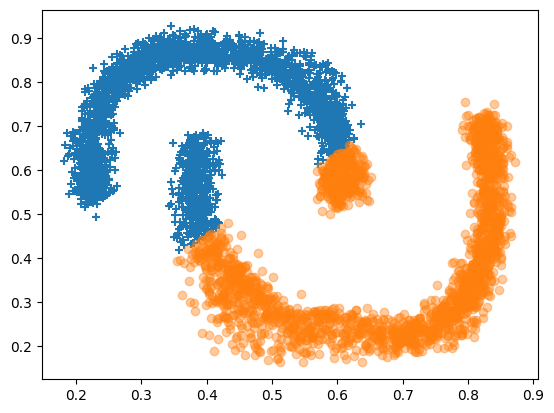

In [30]:
print('Sum of Squared Errors :', kmeans.inertia_)
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(kmeans_y, banana_y))
plt.scatter(kmeans_banana_0['x'], kmeans_banana_0['y'],marker='+')
plt.scatter(kmeans_banana_1['x'], kmeans_banana_1['y'],marker='o', alpha=0.4)
plt.show()

In [10]:
start_time = time.time()
Agglomerative = AgglomerativeClustering(n_clusters=2)
Agg_y = Agglomerative.fit_predict(banana_x)
spend_time = time.time() - start_time
agg_banana_0, agg_banana_1, agg_banana_2, _ = banana_grouping(Agg_y)

Sum of Squared Errors : 209.0130705646415
spend time : 0.44041872024536133 s


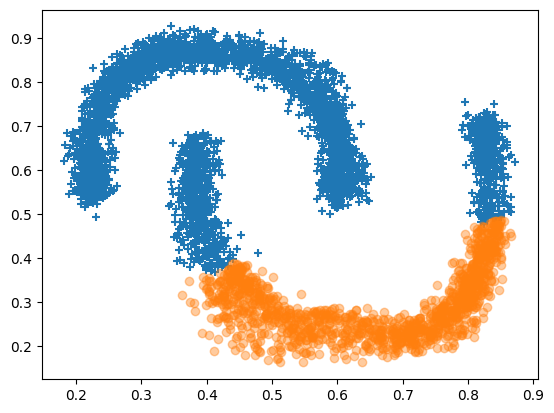

In [11]:
print('Sum of Squared Errors :', get_sse(banana_x, Agg_y))
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(kmeans_y, banana_y))
plt.scatter(agg_banana_0['x'], agg_banana_0['y'],marker='+')
plt.scatter(agg_banana_1['x'], agg_banana_1['y'],marker='o', alpha=0.4)
plt.show()

In [12]:
start_time = time.time()
dbscan = DBSCAN(min_samples=5, eps = 0.04)
dbscan_y = dbscan.fit_predict(banana_x)
spend_time = time.time() - start_time
dbscan_banana_0, dbscan_banana_1, dbscan_banana_2, dbscan_banana_noice = banana_grouping(dbscan_y)

Sum of Squared Errors : 192.0931529021002
spend time : 0.0638270378112793 s


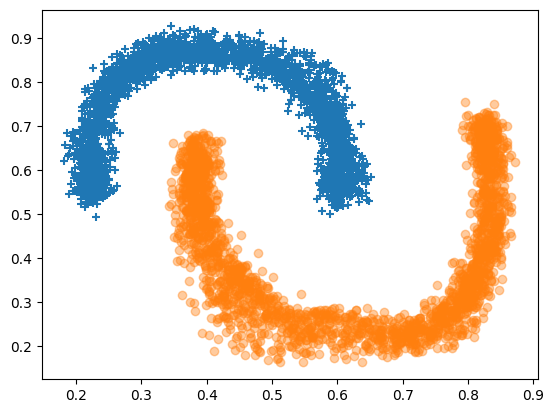

In [13]:
print('Sum of Squared Errors :', get_sse(banana_x, dbscan_y))
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(kmeans_y, banana_y))
plt.scatter(dbscan_banana_0['x'], dbscan_banana_0['y'],marker='+')
plt.scatter(dbscan_banana_1['x'], dbscan_banana_1['y'],marker='o', alpha=0.4)
plt.show()

In [14]:
def size3_grouping(y):
    return_size3_0 = {'x':[], 'y':[]}
    return_size3_1 = {'x':[], 'y':[]}
    return_size3_2 = {'x':[], 'y':[]}
    return_size3_3 = {'x':[], 'y':[]}
    return_size3_noice = {'x':[], 'y':[]}

    for i in range(y.size):
        if int(y[i]) == 0:
            return_size3_0['x'].append(sizes3_x['x'][i])
            return_size3_0['y'].append(sizes3_x['y'][i])
        elif int(y[i]) == 1:
            return_size3_1['x'].append(sizes3_x['x'][i])
            return_size3_1['y'].append(sizes3_x['y'][i])
        elif int(y[i]) == 2:
            return_size3_2['x'].append(sizes3_x['x'][i])
            return_size3_2['y'].append(sizes3_x['y'][i])
        elif int(y[i]) == 3:
            return_size3_3['x'].append(sizes3_x['x'][i])
            return_size3_3['y'].append(sizes3_x['y'][i])
        else:
            return_size3_noice['x'].append(sizes3_x['x'][i])
            return_size3_noice['y'].append(sizes3_x['y'][i])
            
    return return_size3_0, return_size3_1, return_size3_2, return_size3_3, return_size3_noice

In [15]:
sizes3_dataset = pd.read_csv('HW3_dataset/sizes3 (with class label).csv')

In [16]:
sizes3_x = sizes3_dataset.iloc[:,:2]
sizes3_y = sizes3_dataset.iloc[:,-1]

In [17]:
org_size3_0, org_size3_1, org_size3_2, org_size3_3, _ = size3_grouping(sizes3_y)

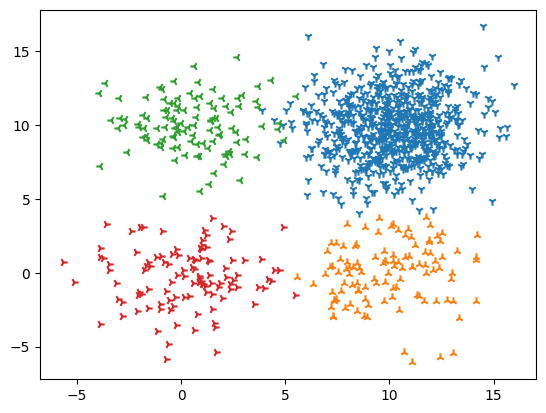

In [18]:
plt.scatter(org_size3_0['x'], org_size3_0['y'],marker='1')
plt.scatter(org_size3_1['x'], org_size3_1['y'],marker='2')
plt.scatter(org_size3_2['x'], org_size3_2['y'],marker='3')
plt.scatter(org_size3_3['x'], org_size3_3['y'],marker='4')
plt.show()

In [19]:
start_time = time.time()
size3_kmeans = KMeans(n_clusters=4, random_state=50, max_iter=1000, n_init = 10)
size3_kmeans_y = size3_kmeans.fit_predict(sizes3_x,sizes3_y)
spend_time = time.time() - start_time
#size3_kmeans_y = size3_kmeans.predict(sizes3_x)

In [20]:
kmeans_size3_0, kmeans_size3_1, kmeans_size3_2, kmeans_size3_3, _ = size3_grouping(size3_kmeans_y)

Sum of Squared Errors : 8341.253299448486
spend time : 0.017948627471923828 s
accuracy : 0.01


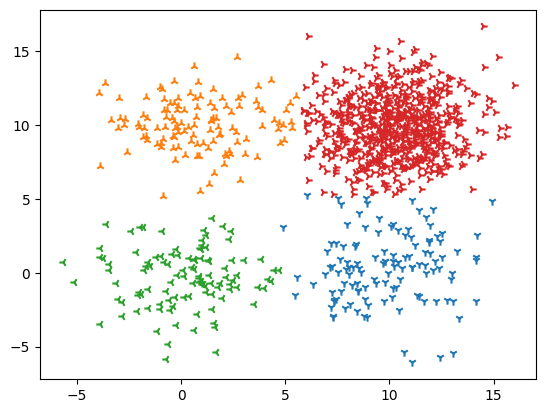

In [31]:
print('Sum of Squared Errors :', size3_kmeans.inertia_)
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(size3_kmeans_y, sizes3_y))
plt.scatter(kmeans_size3_0['x'], kmeans_size3_0['y'],marker='1')
plt.scatter(kmeans_size3_1['x'], kmeans_size3_1['y'],marker='2')
plt.scatter(kmeans_size3_2['x'], kmeans_size3_2['y'],marker='3')
plt.scatter(kmeans_size3_3['x'], kmeans_size3_3['y'],marker='4')
plt.show()

In [22]:
start_time = time.time()
size3_Agglomerative = AgglomerativeClustering(n_clusters=4,compute_distances=True)
size3_agg_y = size3_Agglomerative.fit_predict(sizes3_x, sizes3_y)
spend_time = time.time() - start_time

In [23]:
agg_size3_0, agg_size3_1, agg_size3_2, agg_size3_3, _ = size3_grouping(size3_agg_y)

Sum of Squared Errors : 8373.266532310683
spend time : 0.017948627471923828 s
accuracy : 0.769


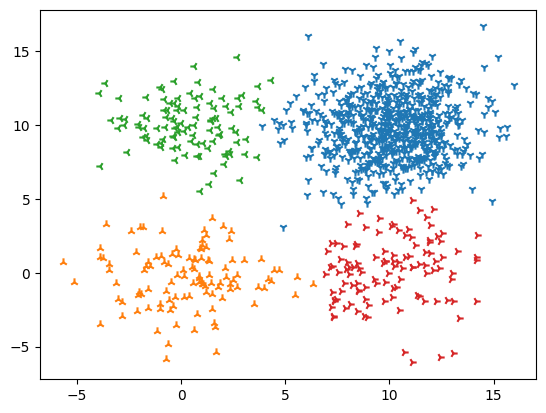

In [32]:
print('Sum of Squared Errors :', get_sse(sizes3_x, size3_agg_y))
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(size3_agg_y, sizes3_y))
plt.scatter(agg_size3_0['x'], agg_size3_0['y'], marker='1')
plt.scatter(agg_size3_1['x'], agg_size3_1['y'], marker='2')
plt.scatter(agg_size3_2['x'], agg_size3_2['y'], marker='3')
plt.scatter(agg_size3_3['x'], agg_size3_3['y'], marker='4')
plt.show()

In [25]:
start_time = time.time()
size3_dbscan = DBSCAN(min_samples=10, eps = 3.5)
size3_dbscan_y = size3_dbscan.fit_predict(sizes3_x,sizes3_y)
spend_time = time.time() - start_time

In [26]:
dbscan_size3_0, dbscan_size3_1, dbscan_size3_2, dbscan_size3_3, dbscan_size3_noice = size3_grouping(size3_dbscan_y)

Sum of Squared Errors : 37193.9169982445
spend time : 0.017948627471923828 s
accuracy : 0.667


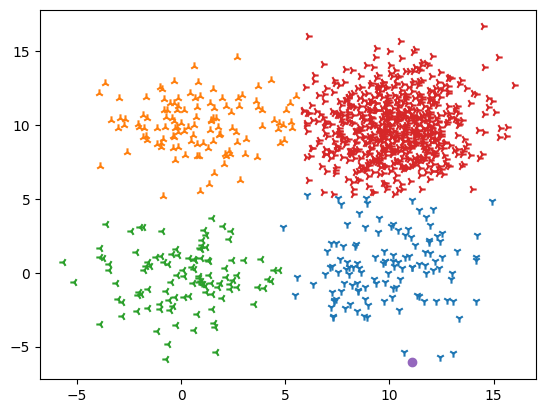

In [33]:
print('Sum of Squared Errors :', get_sse(sizes3_x, size3_dbscan_y))
print('spend time :',spend_time,'s')
print('accuracy :', accuracy_score(size3_dbscan_y, sizes3_y))
plt.scatter(kmeans_size3_0['x'], kmeans_size3_0['y'], marker='1')
plt.scatter(kmeans_size3_1['x'], kmeans_size3_1['y'], marker='2')
plt.scatter(kmeans_size3_2['x'], kmeans_size3_2['y'], marker='3')
plt.scatter(kmeans_size3_3['x'], kmeans_size3_3['y'], marker='4')
plt.scatter(dbscan_size3_noice['x'], dbscan_size3_noice['y'])
plt.show()